# Gazing into the Data Abyss: Employee Attrition

One thing is for sure, there is a LOT of data out there. Ever since we have built on the idea of assigning values to items, we have always been thinking about what-if scenarios on how we can make the most out of what we have. 

It is no surprise that over the several years of exploratory advancements with numbers, we have at the cusp of unlocking the next big thing when it comes to Data Analysis. What we can do with the data we have and how we can optimize it to maximize our objectives, it almost seems magical.

With so many applications out there, I find it amazing to dive deeper into the realm of analytics and see what amazing insights can be taken. With that, I have chosen the concept of employee attrition and what steps we can take when looking at the signs to maximize employee retention.

Before I dive into the technical part, I would like to thank the following people from who I have gained valuable insights while implementing this project:


[Randy Lao](https://www.kaggle.com/randylaosat) : Predicting Employee Kernelover    

https://www.kaggle.com/randylaosat/predicting-employee-kernelover

<br>

[Tuatini GODARD](https://www.kaggle.com/ekami66) : Detailed exploratory data analysis with python

https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python

<br>

[Vincent Lugat](https://www.kaggle.com/vincentlugat) : IBM Attrition Analysis and Prediction   

https://www.kaggle.com/vincentlugat/ibm-attrition-analysis-and-prediction

<br>

[Janio Martinez Bachmann](https://www.kaggle.com/janiobachmann) : Attrition in an Organization || Why Workers Quit?  

https://www.kaggle.com/janiobachmann/attrition-in-an-organization-why-workers-quit

<br>

[Aniket](https://www.kaggle.com/aniketkatyal) : IBM Employee Attrition Classifier  

https://www.kaggle.com/aniketkatyal/ibm-employee-attrition-classifier

<br>

[Anisotropic](https://www.kaggle.com/arthurtok) : Employee attrition via Ensemble tree-based methods  

https://www.kaggle.com/arthurtok/employee-attrition-via-ensemble-tree-based-methods


With credit given where credit is due, this Exploratory Data Analysis (EDA) encompasses with the amalgamation of concepts related to cleaning, defining and analyzing data to obtain meaningful insights. So let’s dive in shall we?

## Attrition: What makes them stay? What makes them go?

Employee retention is one of the biggest metrics that a company should have in mind when thinking of growth. It becomes all the more necessary when you consider the costs of finding, interviewing and hiring the right candidate for the various jobs within the organization. This is all the more detrimental when finding out why people leave the company at an unprecedented rate. Employee attrition is caused when the total strength of the company is greatly reduced as more employees leave the company than expected.

This data set comes from a fictitious scenario come up by the data scientists at IBM. Although it is not attuned to the real-word scenario, it still is a viable dataset to mine and build insights on.  The main crux of the data is to classify what type of people would leave a company based on 35 parameters. Our categorical target for this dataset is a Yes/No classification from the attrition. 

With that in mind, the various steps that we have gone into building insights from start to finish are highlighted in FOUR major blocks:


1.	Collecting and Cleaning the data
2.	Exploring the data
3.	Transforming the data to build insights
4.	Applying machine learning models for feature engineering


With these at the forefront, it highlights the general steps that can be taken to work towards any dataset. For the given attrition dataset, I wanted to focus more on the graphical and visual representation aspect while keeping the machine-learning concepts in the back-burner.

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## STEP 1: Collecting and Cleaning the Data

Once you obtain the data, it is necessary to clean the dataset so that the valuable insights have a defined meaning. There are a number of ways for cleaning data, ranging from null-values to outlier detection; each with its own unique implementation.

In [2]:
# Read the analytics csv file and store our dataset into a dataframe called "df"
#os.listdir("../input")
df = pd.read_csv('../input/WA_Fn-UseC_-HR-Employee-Attrition.csv', index_col=None)

When looking at the bare-bones of the given data, we can find a number of people with distinct categories ranging from age to number of years with their current manager. These parameters are what shape the given dataset and with a bit of machine leaning, we can delve deeper into the main causes of attrition.

In [3]:
# Check to seeh if there are any missing values in our data set
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

Once cleaned, our dataset would look something like this:

In [4]:
# Get a quick overview of what we are dealing with in our dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
# Move the reponse variable "Attrition" to the front of the table
front = df['Attrition']
df.drop(labels=['Attrition'], axis=1,inplace = True)
df.insert(0, 'Attrition', front)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Step 2: Exploring the data

Since the given dataset is split into a numeric values such as Age and labeled values such as Department, it seems prudent to partition the data on quantitative and categorical values. This makes it easier to fine-tune the model for accurate results.

###               General Statistical Insights 

In [6]:
# The dataset contains 35 columns and 1470 observations
df.shape

(1470, 35)

In [7]:
df.dtypes

Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
# Looks like about 84% of employees stayed and 16% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
AttritionRate=df.Attrition.value_counts()/len(df)
AttritionRate

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [9]:
# Display the statistical overview of the employees
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
# Overview of summary (Attrition V.S. Non-Attrition)
Attrition_Summary = df.groupby('Attrition')
Attrition_Summary.mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [11]:
# Reassign target
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
attrition = df[(df['Attrition'] != 0)]
no_attrition = df[(df['Attrition'] == 0)]

One way of visually communicating how data is spread is through histograms. This can give general insights in terms of data distribution. Some of the key takeaways from this dataset are shown below:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff06ec20eb8>,
      dtype=object)

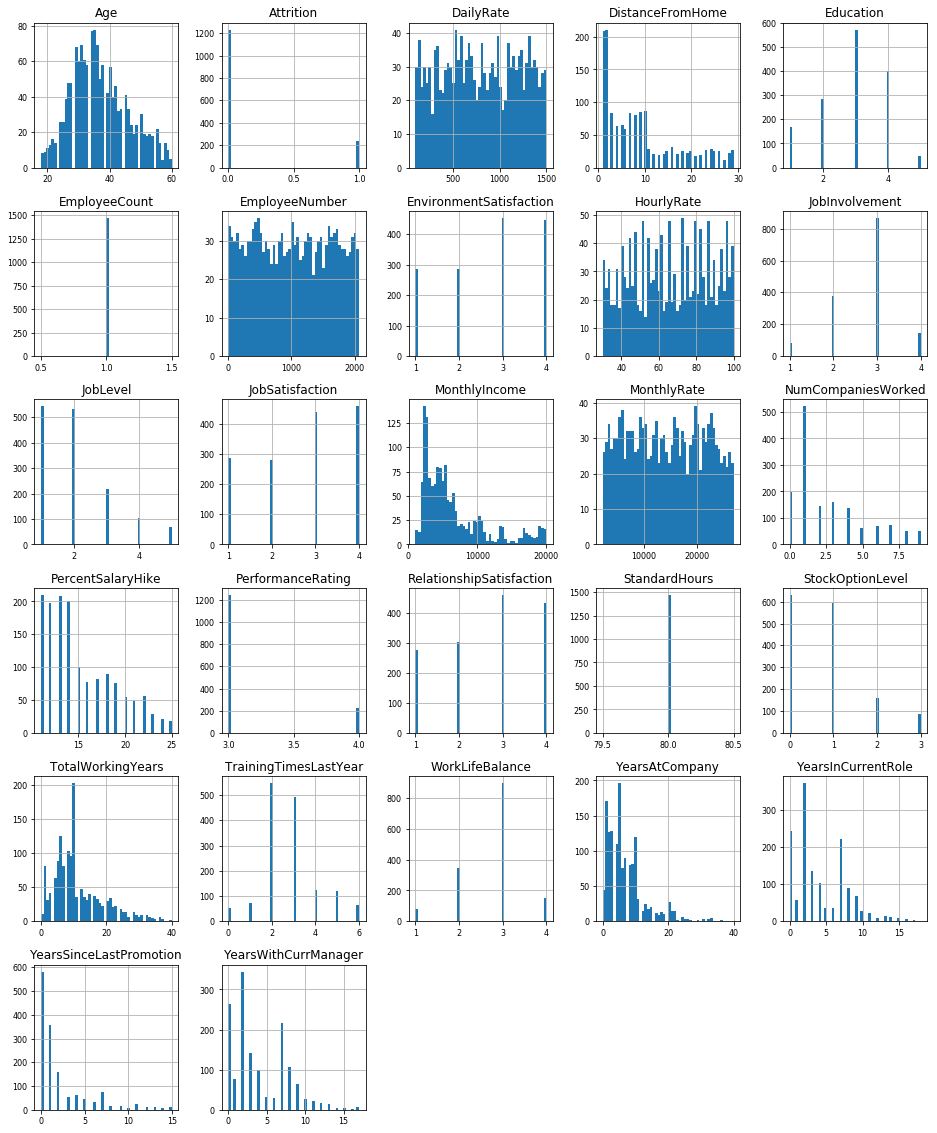

In [12]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Another way of estimating relations between two values arise from the Kernel Density Estimate (KDE) plots.  This makes it easier to highlight the bivariate relationship between data distributions that occur within the framework. Some of the key insights are as followsv

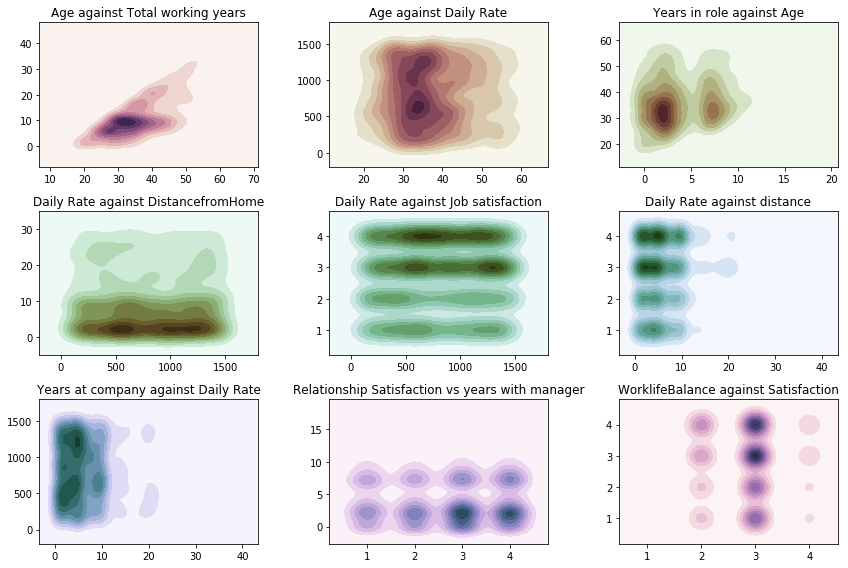

In [13]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(12, 8), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = df['Age'].values
y = df['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df['Age'].values
y = df['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Daily Rate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df['YearsInCurrentRole'].values
y = df['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = df['DailyRate'].values
y = df['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df['DailyRate'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df['YearsAtCompany'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate against distance')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = df['YearsAtCompany'].values
y = df['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df['RelationshipSatisfaction'].values
y = df['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df['WorkLifeBalance'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

f.tight_layout()


Another way of estimating relations between two values arise from the Kernel Density Estimate (KDE) plots.  This makes it easier to highlight the bivariate relationship between data distributions that occur within the framework. Some of the key insights are as follows:

### Quantative data

In [14]:
def plot_distribution(var_select, bin_size) : 
# Calculate the correlation coefficient between the new variable and the target
    corr = df['Attrition'].corr(df[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_attrition', 'No_attrition']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    py.iplot(fig, filename = 'Density plot')

In [15]:
def barplot(var_select, x_no_numeric) :
    tmp1 = df[(df['Attrition'] != 0)]
    tmp2 = df[(df['Attrition'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(df[var_select],df['Attrition']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [16]:
plot_distribution('Age', False)
barplot('Age', False)
plot_distribution('DailyRate', 100)
plot_distribution('DistanceFromHome', False)
barplot('DistanceFromHome', False)
plot_distribution('HourlyRate', False)
plot_distribution('MonthlyIncome', 100)
plot_distribution('MonthlyRate', 100)
plot_distribution('NumCompaniesWorked', False)
barplot('NumCompaniesWorked',False)
plot_distribution('PercentSalaryHike', False)
barplot('PercentSalaryHike', False) 
plot_distribution('TotalWorkingYears', False)
barplot('TotalWorkingYears', False)
plot_distribution('TrainingTimesLastYear', False)
barplot('TrainingTimesLastYear',False)
plot_distribution('YearsAtCompany', False)
barplot('YearsAtCompany', False)
plot_distribution('YearsInCurrentRole', False)
barplot('YearsInCurrentRole', False)
plot_distribution('YearsSinceLastPromotion', False)
barplot('YearsSinceLastPromotion', False)
plot_distribution('YearsWithCurrManager', False)
barplot('YearsWithCurrManager', False)

### Categorical Data

In [17]:
def plot_pie(var_select) :
    
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white', 'lightpink']
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[var_select].value_counts().values.tolist(),
                    labels  = no_attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )

    layout = go.Layout(dict(title = var_select + " distribution in employes attrition ",
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [18]:
plot_pie("Gender")
barplot('Gender',True)
plot_pie('OverTime')
barplot('OverTime',True)
plot_pie('BusinessTravel')
barplot('BusinessTravel',True)
plot_pie('JobRole')
barplot('JobRole',True)
plot_pie('Department') 
barplot('Department',True)
plot_pie('MaritalStatus') 
barplot('MaritalStatus',True)
plot_pie('EducationField') 
barplot('EducationField',True)
plot_pie('Education') 
barplot('Education',False)
plot_pie('EnvironmentSatisfaction')
barplot('EnvironmentSatisfaction',False)
plot_pie('JobInvolvement')
barplot('JobInvolvement', False)
plot_pie('JobLevel')
barplot('JobLevel',False)
plot_pie('JobSatisfaction')
barplot('JobSatisfaction',False)
plot_pie('PerformanceRating')
barplot('PerformanceRating',False)
plot_pie('RelationshipSatisfaction')
barplot('RelationshipSatisfaction', False)
plot_pie('StockOptionLevel')
barplot('StockOptionLevel', False)
plot_pie('WorkLifeBalance')
barplot('WorkLifeBalance', False)

## Step 3: Transforming the data to build insights

Data in its innate nature needs to be molded so that we can mine it for insights. The main drive behind this is to fine-tune the data so that we can build actionable metrics from the data as a whole. With this, both the categorical and quantitative data ca be shaped.

When working with categorical values, there may or may not exist a quantifiable priority within the labels. Therefore, one-hot encoding is used to give a quantifiable value to the categorical labels. 

In [19]:
df_categorical = df[['Attrition', 'BusinessTravel','Department',
                       'EducationField','Gender','JobRole',
                       'MaritalStatus',
                       'OverTime']].copy()
df_categorical.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


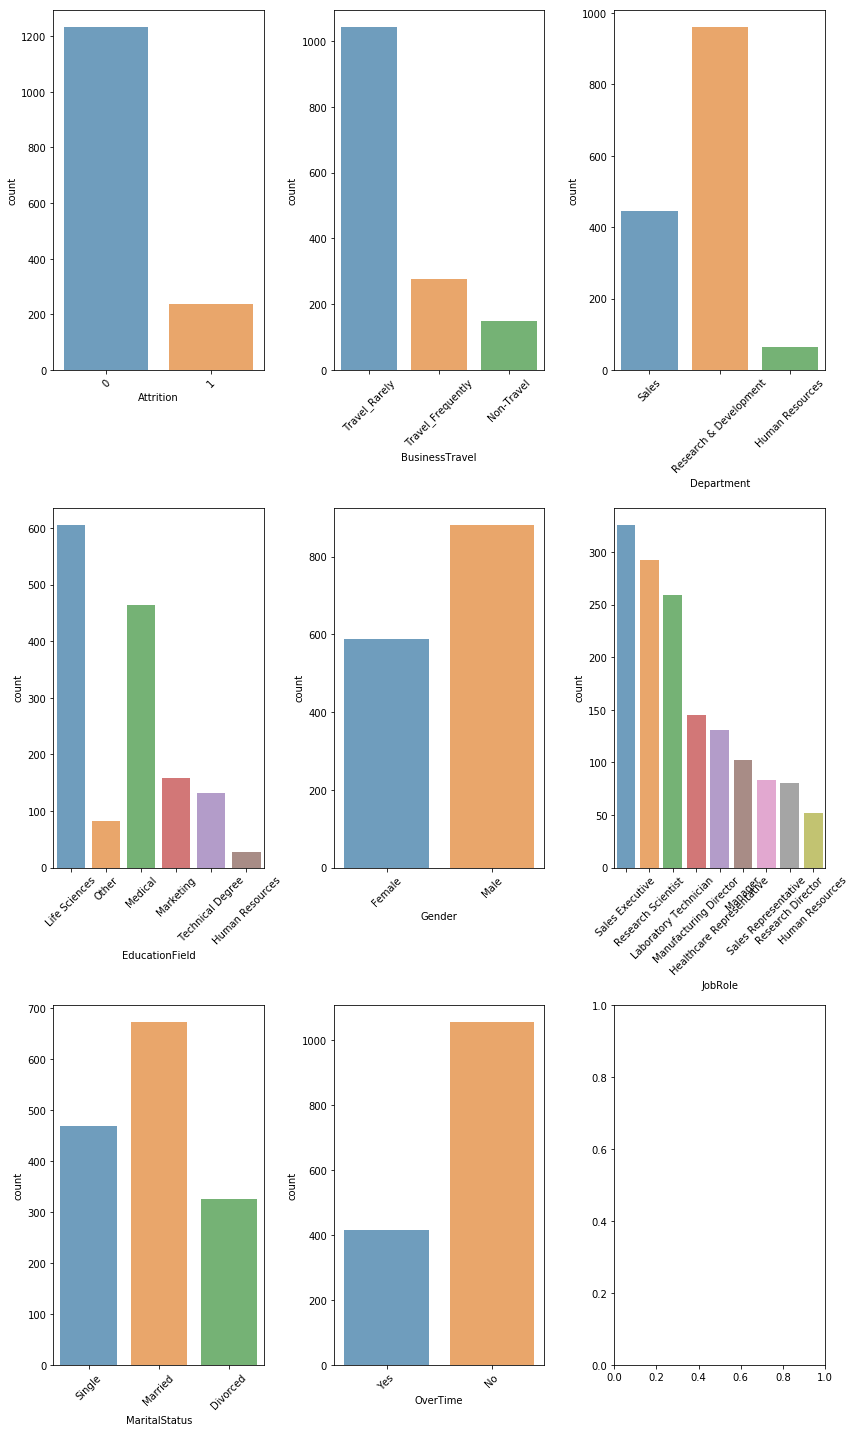

In [20]:
fig, axes = plt.subplots(round(len(df_categorical.columns) / 3), 3, figsize=(12, 20))

for i, ax in enumerate(fig.axes):
    if i < len(df_categorical.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_categorical.columns[i], alpha=0.7, data=df_categorical, ax=ax)

fig.tight_layout()

### Perfroming One-Hot Encoding on the categorical data 

In [21]:
# We create dummies for the remaining categorical variables

df_categorical = pd.get_dummies(df_categorical)
df_categorical.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


A correlation matrix is the fastest way to see which metrics are related to each other. Although correlation does not mean causation, it is a great way to estimate the underlying behaviors within the dataset.

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.056652,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.077924,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010577,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,-0.103369,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,-0.006846,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.130016,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


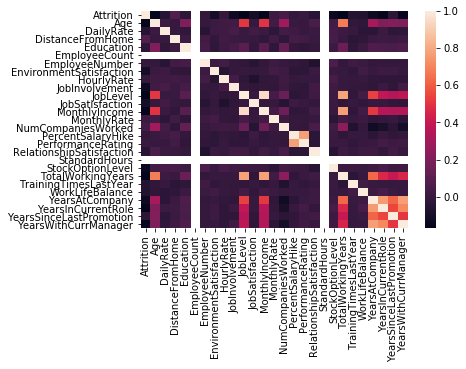

In [22]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

Now from the above heat-map plot, we can see that YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion and YearsWtihCurrManager are closely related, Hence we drop those columns. Also, we'll drop the following rows based on their High Correlation coefficient from the plot:

1. TotalWorkingYears
2. PercentSalaryHike
3. PerformanceRating
4. NumCompaniesWorked
5. MonthlyIncome

We will also delete EmployeeCount and StandardHours as they do not have any variance between their values.

### Obtaining the quantitative data

In [23]:
#After removing the strongly correlated variables
df_numerical = df[['Age','DailyRate','DistanceFromHome','Education',
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel','MonthlyRate',
                       'JobSatisfaction',
                       'RelationshipSatisfaction', 
                       'StockOptionLevel',
                        'TrainingTimesLastYear','WorkLifeBalance']].copy()
df_numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyRate,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,41,1102,1,2,2,94,3,2,19479,4,1,0,0,1
1,49,279,8,1,3,61,2,2,24907,2,4,1,3,3
2,37,1373,2,2,4,92,2,1,2396,3,2,0,3,3
3,33,1392,3,4,4,56,3,1,23159,3,3,0,3,3
4,27,591,2,1,1,40,3,1,16632,2,4,1,3,3


In [24]:
#Standardizing the numerical values
df_numerical = abs(df_numerical - df_numerical.mean())/df_numerical.std()  
df_numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyRate,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,0.446199,0.742274,1.010565,0.891385,0.660306,1.382668,0.379543,0.057768,0.725773,1.152861,1.583639,0.931697,2.171243,2.492972
1,1.321915,1.297333,0.147100,1.867790,0.254538,0.240595,1.025818,0.057768,1.488370,0.660628,1.191033,0.241906,0.155654,0.337981
2,0.008340,1.413882,0.887213,0.891385,1.169383,1.284288,1.025818,0.961159,1.674271,0.246116,0.658749,0.931697,0.155654,0.337981
3,0.429518,1.460969,0.763861,1.061426,1.169383,0.486544,0.379543,0.961159,1.242788,0.246116,0.266142,0.931697,0.155654,0.337981
4,1.086306,0.524116,0.887213,1.867790,1.575150,1.273580,0.379543,0.961159,0.325789,0.660628,1.191033,0.241906,0.155654,0.337981


### Combining quantitative and categorical data   

In [25]:
final_df = pd.concat([df_numerical,df_categorical], axis= 1)
final_df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyRate,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.446199,0.742274,1.010565,0.891385,0.660306,1.382668,0.379543,0.057768,0.725773,1.152861,1.583639,0.931697,2.171243,2.492972,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,1.321915,1.297333,0.147100,1.867790,0.254538,0.240595,1.025818,0.057768,1.488370,0.660628,1.191033,0.241906,0.155654,0.337981,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0.008340,1.413882,0.887213,0.891385,1.169383,1.284288,1.025818,0.961159,1.674271,0.246116,0.658749,0.931697,0.155654,0.337981,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0.429518,1.460969,0.763861,1.061426,1.169383,0.486544,0.379543,0.961159,1.242788,0.246116,0.266142,0.931697,0.155654,0.337981,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,1.086306,0.524116,0.887213,1.867790,1.575150,1.273580,0.379543,0.961159,0.325789,0.660628,1.191033,0.241906,0.155654,0.337981,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


## STEP 4: Feature Engineering 

Now that the data has been prepped for analysis, it is time to apply machine learning methodologies to the dataset.

The following technique were used to implement the dataset to estimate the best model that would be used

1.	Logistic Regression – Sine there are 1/0 value datasets, it makes it ideal to estimate.
2.	Decision Tree – An easy to implement classification method.
3.	Random Forrest – Decision trees with overfitting prevention
4.	SVM – Classify data based on its location on the hyperplane
5.	KNN - Classify data based on its location with similar clusters


With these implemented, we get an estimate on what would be the best approach to take.

In [26]:
X = final_df.drop(['Attrition'],axis= 1)
y = final_df["Attrition"]

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 4)

Using multiple classfications alogorithms and selecting the best out of them:

### Logistic Regression 

In [28]:
lr = LogisticRegression(solver = 'liblinear',random_state = 0) #Since this a small dataset, we use liblinear solver and Regularization strength as
# default i.e C = 1.0
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
y_pred_lr = lr.predict(X_test)
accuracy_score_lr = accuracy_score(y_pred_lr,y_test)
accuracy_score_lr 
#Logistic Regression shows 85.7 percent accuracy

0.8571428571428571

### DecisionTreeClassifier 

In [30]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth = 4,random_state = 0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [31]:
y_pred_dtree = dtree.predict(X_test)
accuracy_score_dtree = accuracy_score(y_pred_dtree,y_test)
accuracy_score_dtree

0.8384353741496599

### RandomForestClassifier 

In [32]:
rf = RandomForestClassifier(criterion = 'gini',random_state = 0)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
y_pred_rf = rf.predict(X_test)
accuracy_score_rf = accuracy_score(y_pred_rf,y_test)
accuracy_score_rf

0.8605442176870748

### Support Vector Machines 

In [34]:
sv = svm.SVC(kernel= 'linear',gamma =2)
sv.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
y_pred_svm = sv.predict(X_test)
accuracy_score_svm = accuracy_score(y_pred_svm,y_test)
accuracy_score_svm

0.8605442176870748

### KNN Algorithm 

In [36]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [37]:
y_pred_knn = knn.predict(X_test)
accuracy_score_knn = accuracy_score(y_pred_knn,y_test)
accuracy_score_knn

0.8503401360544217

Comparing the various classifiers

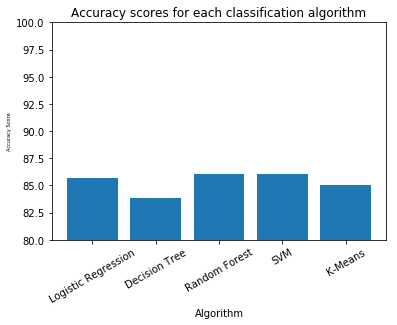

In [38]:
scores = [accuracy_score_lr,accuracy_score_dtree,accuracy_score_rf,accuracy_score_svm,accuracy_score_knn]
scores = [i*100 for i in scores]
algorithm  = ['Logistic Regression','Decision Tree','Random Forest','SVM', 'K-Means']
index = np.arange(len(algorithm))
plt.bar(index, scores)
plt.xlabel('Algorithm', fontsize=10)
plt.ylabel('Accuracy Score', fontsize=5)
plt.xticks(index, algorithm, fontsize=10, rotation=30)
plt.title('Accuracy scores for each classification algorithm')
plt.ylim(80,100)
plt.show()    

As we can see, SVM and Random forests take the lead. We can break down the metrics to see what the most driving factors are:

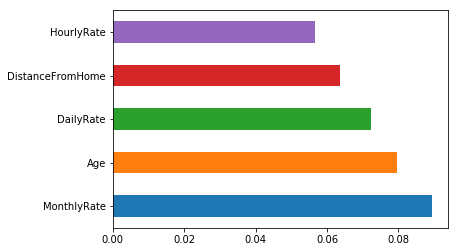

In [39]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances= feat_importances.nlargest(5)
feat_importances.plot(kind='barh')
plt.show()

## Outcomes and key takeaways

Based on the above results, how much people earn and how old they are greatly affect their reason for changing to a different company. In a world where we constantly strive to know our worth, it goes to say that we will find greener pastures if we do not find it at a single point. Ultimately, it falls on the company to maximize their employee retention with a focus on their pay. Although it might decrease net company revenue in the short run, the cost of rehiring and re-training each and every time an employee leaves will definitely leave a mark.


All in all, there are so many ways to approach the same data problem from different angles. With practice, the end goal will be to form an effective story with the data to provide actionable insights. Thank you very much for coming along with me on this journey. This was a great learning experience for me and I hope that it would be for you as well. 


# **Do Reach Out!**


If you found something that catches your eye or just have a chat about data science topics in general, I will be more than happy to connect with you on:

LinkedIn: https://www.linkedin.com/in/shawn-dsouza/

My Website: https://shawndsouza29.wixsite.com/portfolio

This notebook will always be a work in progress. Please leave any comments about further improvements to the notebook! Any feedback or constructive criticism is greatly appreciated. Thank you guys!